In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
# a new addition to our standard imports
import scipy.stats as stats  

In [2]:
# scipy.stats.norm.rvs when used like this is pretty much
# equivalent to numpy.random.normal which we've used previously
x = stats.norm.rvs(loc=0, scale=1, size=1000)

In [3]:
# when we call stats.norm like this we're creating
# a "frozen distribution" -- essentially an object
# representing the normal distribution with the given 
# parameters. In this case we're specificing the so-called
# "standard normal" distribution -- i.e the normal distribution
# with mean = 0, std dev = 1
STDNORM = stats.norm(loc=0,scale=1)

# now we can get random values from our frozen distribution
y = STDNORM.rvs(size=1000)

In [4]:
# to draw the probability density function (pdf) for our normal
# distribution, we need a set of values of x where we'll evaluate
# the function.  numpy.linspace generate the specified number of 
# points (in this case 500) within the given interval (-6,6 in 
# this example)
xs = np.linspace(-6,6,500)

# we evaluate our pdf at the specified x-values to get back
# the corresponding densities
fx = STDNORM.pdf(xs)

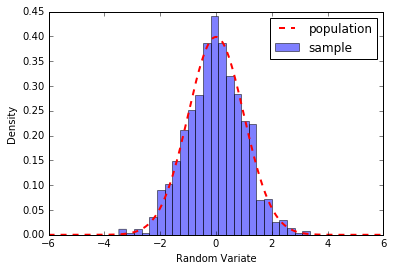

In [5]:
# create a histogram of our sample from the standard normal
plt.hist(y,alpha=0.5,normed=True,  # note the used of normed=True to generate
         bins=25,label='sample')   # a density histogram

# plot the pdf for the standard normal
plt.plot(xs, fx, color='red', 
         linestyle='dashed', linewidth=2,
         label='population')

# note the use of the label arguments above to create
# labels for the legend; by default the legend() fxn
# tries to find the best placement of the legend so as
# not to minimally interfere with the plotted data
plt.legend()

plt.xlabel("Random Variate")
plt.ylabel("Density")
pass

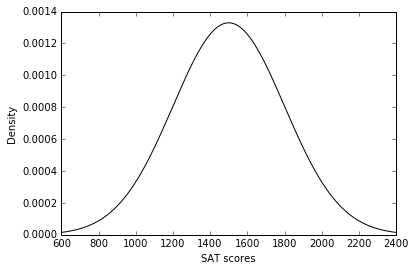

In [6]:
# let's generate the pdf for the SAT example
# we covered in lecture, which was assumed to be
# N(mu=1500,sigma=300)
SAT = stats.norm(loc=1500, scale=300)
xsat = np.linspace(600,2400,500)
fsat = SAT.pdf(xsat)
plt.plot(xsat,fsat,'black')
plt.xlabel("SAT scores")
plt.ylabel("Density")
pass

In [7]:
# In the example from the slides, Pam had a score of 1800
# on her SATs.  We can use the scipy.stats.norm.cdf fxn to 
# calculate her percentile. cdf returns the cumulative probability to
# the left of the given point. Strictly speaking, to turn
# this into a percentile we need to multiply by hundred
pamcdf = SAT.cdf(1800)
print("Pam's percentile is", pamcdf * 100)

Pam's percentile is 84.1344746069


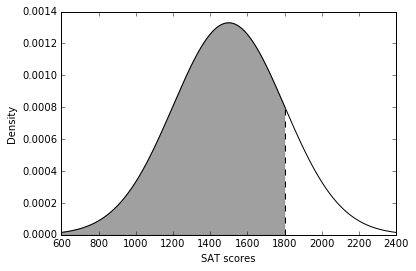

In [8]:
# Let's redraw the PDF, illustrating how to draw a line at
# Pam's score (1800) and shade the area to the left of it

# draw entire pdf first
# note xsat and fsat were defined a couple cells above
plt.plot(xsat, fsat, color='black')  

# plot vertical line at 1800 extending from 0 to pdf(1800)
plt.vlines(1800, 0, SAT.pdf(1800), linestyle='dashed', color='k')

# draw area under curve from 600 to 1800
xtoleft = np.linspace(600,1800,500)
ftoleft = SAT.pdf(xtoleft)
plt.fill_between(xtoleft, np.zeros_like(ftoleft), ftoleft, color='gray', alpha=0.75)

plt.xlabel("SAT scores")
plt.ylabel("Density")

pass

In [9]:
# Another example we looked at in class involved
# quality control at a ketchup factory.  The volume
# of ketchup in bottles was ~ N(36 oz,0.11 oz).  We first
# asked what the probability was that a sampled bottle
# had <= 35.8 oz of ketchup 
kmu, kstd = 36, 0.11
ketchup = stats.norm(loc=kmu, scale=kstd)
ketchup.cdf(35.8)

0.034518173997205637

In [10]:
# then we asked what fraction of bottles had between
# 35.8 and 36.2 oz of ketchup. Here's one way to calculate
# this value.  Note the introduction of the scipy.stats.norm.sf 
# function (also called the "survival function" = 1 - cdf)
1 - ketchup.cdf(35.8) - ketchup.sf(36.2)

0.93096365200558884

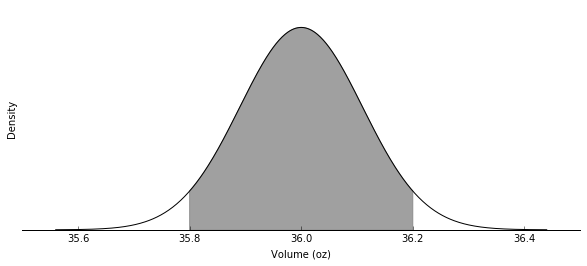

In [11]:
# let's illustrate this last example with one more figure.
# We'll make this figure slightly fancier by changes its aspect
# ratio, customizing the axes, etc.

# set figure size -- (length, width) in inches
fig = plt.figure(figsize=(10,4))  

xvol = np.linspace(kmu - 4*kstd, kmu + 4*kstd, 500)
fvol = ketchup.pdf(xvol)
plt.plot(xvol, fvol, color='black')

# shade area representing fraction of bottles that
# are expected to pass inspection (btw 35.8 and 36.2)
xpass = np.linspace(35.8,36.2,500)
fpass = ketchup.pdf(xpass)
plt.fill_between(xpass, np.zeros_like(fpass), fpass, color='gray', alpha=0.75)

plt.xlabel("Volume (oz)")
plt.ylabel("Density")

#---------------------------------------------------------
# Below here we're just customizing the look of the figure

# get rid of yticks
plt.yticks([])

# get current axes
ax = plt.gca() 

# draw xsticks only at the bottom
ax.xaxis.set_ticks_position('bottom')

# remove left, right, and top "spines" surrounding the plot
ax.spines["left"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)


pass

In [12]:
# if you find yourself drawing lots of figures like the one above
# you should write a couple of functions to encapsulate the key steps

def norm_plot(mu, sigma, nstds=4, npts=500, **kw):
    """Draw the probability density fxn for N(mu,sigma).
    
    nstds = how many standard deviation to left/right to draw pdf
    npts = number of pts over which to evaluate the pdf
    **kw = any additional keywords are passed along to pyplot.plot 
    """
    distribution = stats.norm(loc=mu, scale=sigma)
    xmin, xmax = mu-nstds*sigma, mu+nstds*sigma
    x = np.linspace(xmin,xmax,npts)
    y = distribution.pdf(x)
    plt.plot(x, y, **kw)  # notice how we pass any additional keywords to the plot fxn
    
    # make it look nice
    plt.ylim(0, max(y)*1.1)
    plt.yticks([])
    ax = plt.gca() 
    ax.xaxis.set_ticks_position('bottom')
    ax.spines["left"].set_visible(False)
    ax.spines["right"].set_visible(False)
    ax.spines["top"].set_visible(False)
    plt.ylabel("Density")
    
    # return the "frozen" distribution and the axes representing our plot  
    return distribution, ax
    
    
def area_under_distn(distribution, xmin, xmax, npts=500, **kw):
    """Draw the area under the pdf of the given distribution from xmin, xmax.
    
    distribution = a frozen distribution from scipy.stats
    """
    x = np.linspace(xmin,xmax,npts)
    y = distribution.pdf(x)
    plt.fill_between(x, np.zeros_like(y), y, **kw)

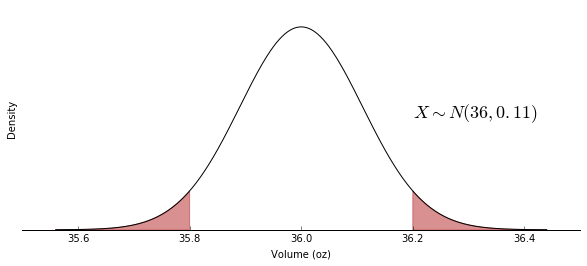

In [13]:
# here's how we can use our two fxns defined above to quickly create 
# some nice figures with a minimum of code. We'll illustrate it by drawing
# a figure showing the fraction of bottles that are expected NOT to pass
# inspection (the inverse of the previous figure above)

mu, sigma = 36, 0.11

plt.figure(figsize=(10,4))
distn, ax = norm_plot(mu, sigma, color='k')
area_under_distn(distn, mu-4*sigma, 35.8, color='firebrick', alpha=0.5)
area_under_distn(distn, 36.2, mu+4*sigma, color='firebrick', alpha=0.5)

# tweak the plot with labels and additional text
plt.xlabel("Volume (oz)")

# draw some text on the plot. We use the markup language 
# LaTeX to draw a nicely formatted shorthand formula
plt.text(36.2, 2, "$X \sim N(36,0.11)$", fontsize=18)
pass

## A note about colors in matplotlib

Color arguments to Matplotlib function support [HTML named colors](https://en.wikipedia.org/wiki/Web_colors) like `'firebrick'` above. You can also specify [colors use Hexadecimal numbers](web hexadecimal colors) (also common in web programming) or RGB values using a tuple of values in the range 0-1.  For more details see the [Matplotlib color documentation](http://matplotlib.org/api/colors_api.html).
